In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2000-01-01'
end = '2022-07-31'

# Tickers of assets
assets = """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS	VEDL.NS	WIPRO.NS""".split(
    "\t")
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  28 of 28 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.8610%,-7.2010%,-0.3105%,0.5421%,8.0026%,5.2201%,-3.4207%,2.2353%,3.7927%,-1.1484%,...,6.3411%,0.2936%,-1.3406%,-2.4092%,-3.9446%,0.1954%,-1.0823%,-5.3308%,-1.4181%,8.0005%
2000-01-05,-2.6022%,-2.8475%,-2.5512%,-2.0611%,-3.7386%,8.0739%,-4.7476%,-3.9413%,7.9969%,-3.5576%,...,-4.1104%,-4.4003%,-3.5102%,-4.1659%,2.4255%,1.9506%,3.8130%,-6.1058%,-0.6103%,1.6297%
2000-01-06,-2.4809%,5.6536%,6.8476%,-5.5190%,5.9628%,8.0109%,2.7690%,0.8086%,7.8264%,4.0139%,...,5.0513%,1.4354%,-0.0973%,3.3431%,4.1500%,3.1250%,7.4736%,8.0202%,4.6491%,-1.9347%
2000-01-07,-4.8924%,-0.1183%,7.9997%,-7.9876%,-7.9715%,7.7500%,-3.5412%,0.0297%,4.4351%,5.4519%,...,4.7127%,-7.9623%,-7.9991%,7.9729%,8.0144%,-0.1855%,2.1991%,-2.1070%,-2.3470%,-7.9990%
2000-01-10,3.0864%,1.3426%,7.5074%,-3.3385%,-1.6480%,1.3148%,-0.5586%,-1.4553%,-6.5802%,0.7584%,...,-1.3904%,-1.8245%,-4.5933%,0.8827%,7.8991%,7.0012%,5.9901%,-0.9908%,2.1459%,0.1353%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
weights,3.9045%,0.0000%,14.6922%,0.9865%,1.4138%,0.2990%,0.0000%,11.5074%,0.0000%,2.1925%,...,0.0000%,0.6267%,13.3126%,0.0000%,0.0000%,0.0000%,2.7310%,9.0587%,5.0972%,0.0000%


### 2.2 Plotting portfolio composition

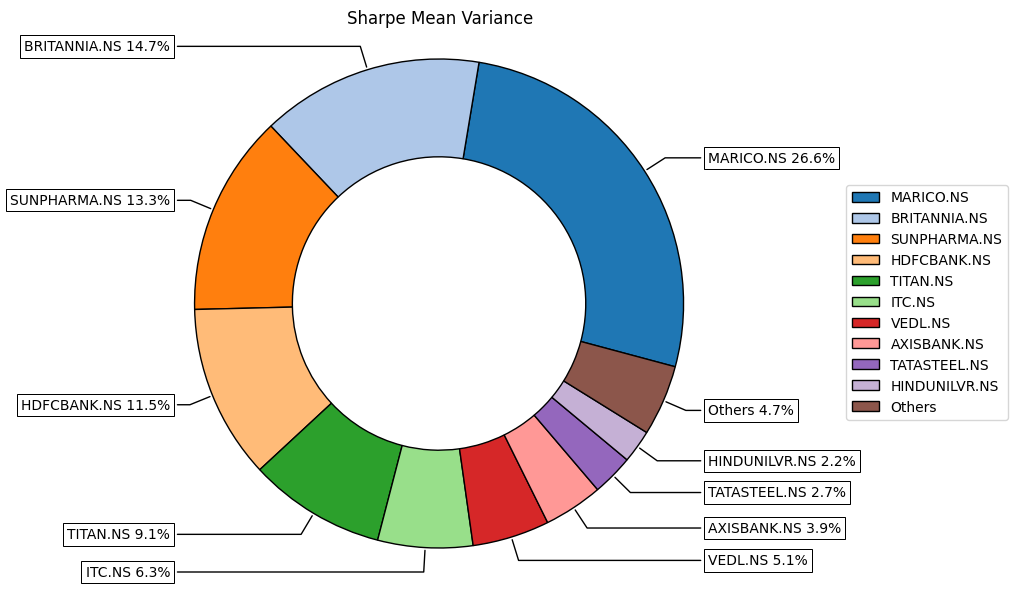

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Plotting Risk Composition

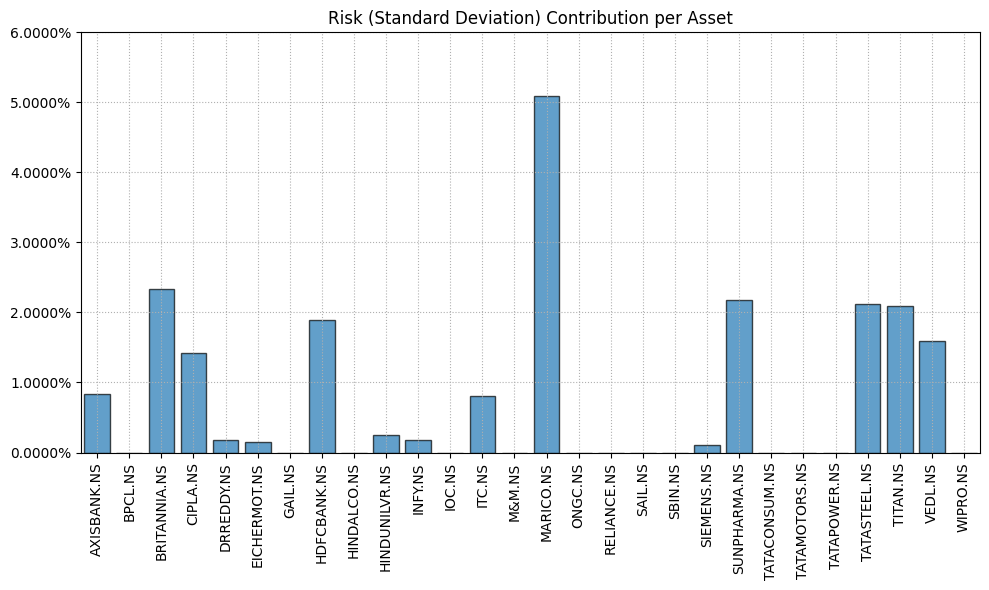

In [5]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

## 3. Estimating Risk Parity Portfolios for Other Risk Measures

In this part I will calculate risk parity portfolios. First I'm going to calculate risk parity portfolio when we use variance as risk measure, then I'm going to calculate the risk parity portfolios for all available risk measures.

### 3.1 Calculating the risk parity portfolio for variance.

In [6]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
weights,3.9045%,0.0000%,14.6922%,0.9865%,1.4138%,0.2990%,0.0000%,11.5074%,0.0000%,2.1925%,...,0.0000%,0.6267%,13.3126%,0.0000%,0.0000%,0.0000%,2.7310%,9.0587%,5.0972%,0.0000%


### 3.2 Plotting portfolio composition

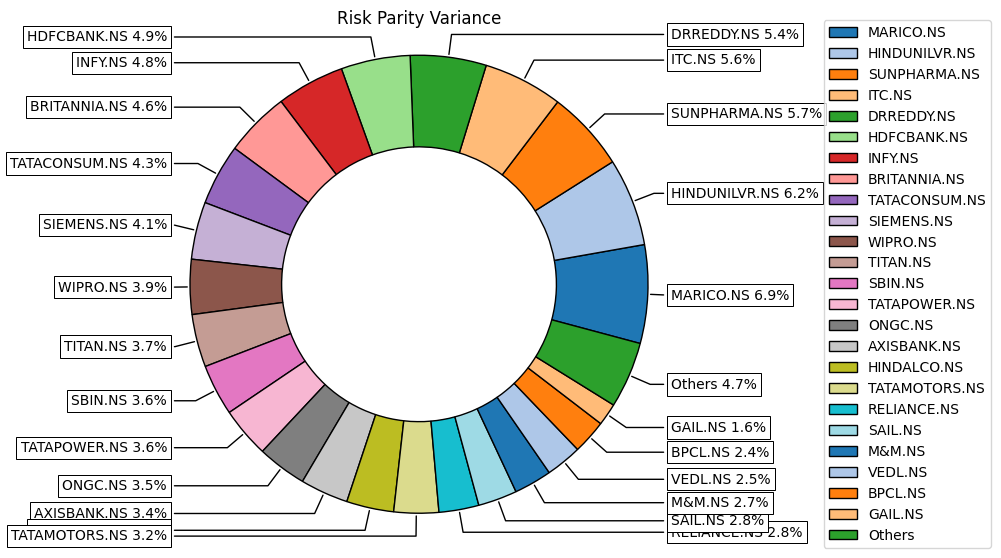

In [7]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3  Plotting Risk Composition

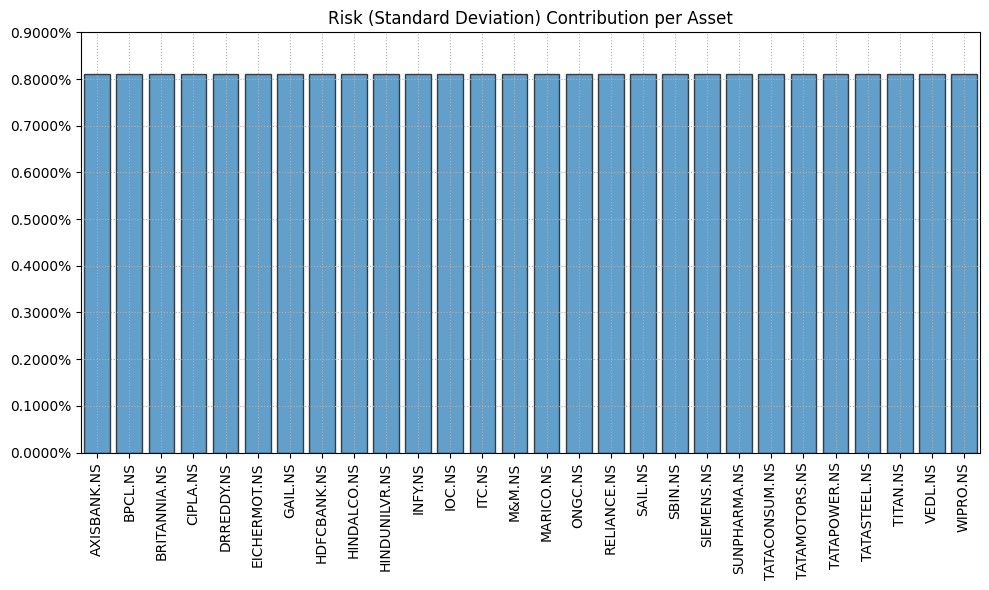

In [8]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)